In [159]:
from IPython.core.display import HTML
HTML("<style>div.container { width: 100% !important; }</style>")

# Find data set

The dataset is from `Kaggle` Breast Cancer dataset by Rahma Sleam
<br>
<br>
This diagnostic dataset is from Breast Cancer Wisconsin.
<br><br>
https://www.kaggle.com/datasets/rahmasleam/breast-cancer
<br>
### Data Description

The data is a 569 by 31 matrix.<br><br>
It contains 569 patient samples as rows.<br><br>
"diagnosis" column is the diagnosis classified as either "M" for malignant(cancerous), or "B" for Benign(non-cancerous).<br><br>
It has 30 columns to characterize the patient's sample:
<br>
`radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, `smoothness_mean`, `compactness_mean`, `concavity_mean`, `concave points_mean`, `symmetry_mean`, `fractal_dimension_mean`,<br>
`radius_se`, `texture_se`, `perimeter_se`, `area_se`, `smoothness_se`, `compactness_se`, `concavity_se`, `concave points_se`, `symmetry_se`, `fractal_dimension_se`, <br>
`radius_worst`, `texture_worst`, `perimeter_worst`, `area_worst`, `smoothness_worst`, `compactness_worst`, `concavity_worst`, `concave points_worst`, `symmetry_worst`, `fractal_dimension_worst`


# Objective

- Understand and clean the dataset 

- The main goal is to build classification models to predict if the breast cancer sample from this dataset is malignant or benign.

- Fine-tune hyperparameters and compare the performance of various classification algorithms.


In [137]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/Users/alexcui/Desktop/projects/Python/ML_IBM/data/breast-cancer.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.dtypes.value_counts()

float64    30
int64       1
object      1
dtype: int64

In [5]:
data.drop('id', axis=1, inplace=True)

In [6]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Encoding for the Target column

In [7]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data.diagnosis)
data['diagnosis'].sample(5)

307    0
473    0
40     1
331    0
306    0
Name: diagnosis, dtype: int64

# Replacing outliers to lower and upper bound values

In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
def detect_outliers(column,data):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    
    # interquartile range
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

In [10]:
for i in data.columns[1:]:
    data=detect_outliers(i,data)

In [11]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.062916,19.254736,91.543787,639.765202,0.096266,0.103222,0.086937,0.048552,0.180734,...,16.183882,25.648453,106.705369,849.907821,0.132209,0.249883,0.268754,0.114606,0.287616,0.083342
std,0.483918,3.340025,4.187510,23.047218,305.343508,0.013685,0.049386,0.073900,0.037633,0.026067,...,4.587249,6.054406,31.957777,475.645240,0.022320,0.142851,0.197461,0.065732,0.053868,0.015993
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.057975,0.019380,0.000000,0.000000,0.111200,...,7.930000,12.020000,50.410000,185.200000,0.072500,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


# Set Training and Testing Datasets

In [12]:
X = data.drop('diagnosis', axis=1)  # Drop the target column
y = data['diagnosis']  # Target column

# Scaling

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Dataset into Training and Testing Sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Multiple Classification Models for Comparison

In [28]:
models = {
    'Logistic Regression' : LogisticRegression(random_state=42),
    'SVM' : SVC(random_state = 42),
    'KNN': KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(random_state = 42),
    "Ada Boost":AdaBoostClassifier(random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

# Define Parameters for Grid Search Cross Validation

In [31]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100], 
        'penalty': ['l1', 'l2', 'elasticnet'],  
        'solver': ['liblinear', 'lbfgs', 'saga'], 
        'max_iter': [10000, 20000, 30000] 
    },
    "SVM": {
        'C': [0.01, 0.1, 1, 10, 100], 
        'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10] 
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Random Forest": {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "Ada Boost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    }
}

In [73]:
# Store Results
results = {}

# Train each model and evaluate
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model=grid_search.best_estimator_
    best_score=grid_search.best_score_
    best_params=grid_search.best_params_
    y_pred = best_model.predict(X_test)
    results[model_name]={
        "Model": model_name,
        "Best Params":best_params,
        "Accuracy":best_score
    }

    print(f"Best score for {model_name} with {best_params}: {best_score:.4f}")
    print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best score for Logistic Regression with {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}: 0.9780
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score for SVM with {'C': 100, 'gamma': 'scale'}: 0.9780
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Fitting 5 folds for each of 16 candidates,

In [100]:
df = pd.DataFrame.from_dict(results, orient='index')
df['Accuracy'] = round(df['Accuracy'], 4)
df

,Model,Best Params,Accuracy
Logistic Regression,Logistic Regression,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2',...",0.9780
SVM,SVM,"{'C': 100, 'gamma': 'scale'}",0.9780
KNN,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.9670
Random Forest,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'm...",0.9626
Ada Boost,Ada Boost,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.9780
Gradient Boosting,Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.9670
Decision Tree,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.9341


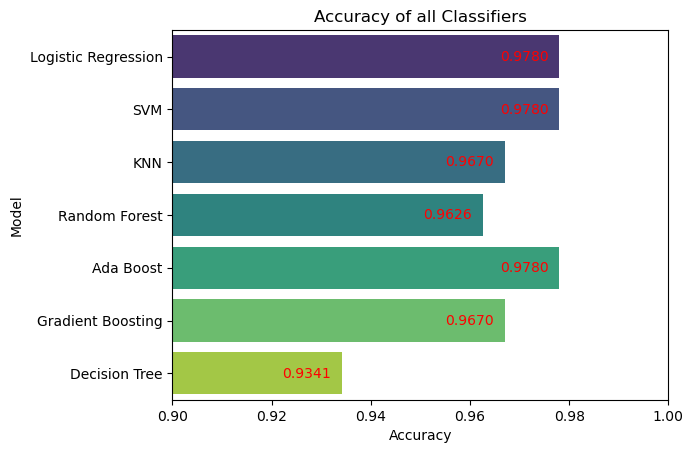

In [109]:
ax = sns.barplot(x="Accuracy", y="Model", data=df, palette="viridis")
for index, value in enumerate(df['Accuracy']):
    ax.text(value - 0.012, index, f'{value:.4f}', va='center', color="red", ha='left', fontsize=10)
plt.title("Accuracy of all Classifiers")
plt.xlim(0.9, 1)
plt.show()

In [85]:
df

,Model,Best Params,Accuracy
Logistic Regression,Logistic Regression,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2',...",0.978022
SVM,SVM,"{'C': 100, 'gamma': 'scale'}",0.978022
KNN,KNN,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.967033
Random Forest,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'm...",0.962637
Ada Boost,Ada Boost,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.978022
Gradient Boosting,Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.967033
Decision Tree,Decision Tree,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.934066


In [110]:
best_accuracy = df['Accuracy'].max()
best_models = df[df['Accuracy'] == best_accuracy]

# Output the best models and their corresponding parameters and accuracy
print("Best models with their corresponding accuracy:\n")
print(best_models[['Model', 'Best Params', 'Accuracy']])

Best models with their corresponding accuracy:

                                   Model  \
Logistic Regression  Logistic Regression   
SVM                                  SVM   
Ada Boost                      Ada Boost   

                                                           Best Params  \
Logistic Regression  {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2',...   
SVM                                       {'C': 100, 'gamma': 'scale'}   
Ada Boost            {'algorithm': 'SAMME', 'learning_rate': 1.0, '...   

                     Accuracy  
Logistic Regression     0.978  
SVM                     0.978  
Ada Boost               0.978  


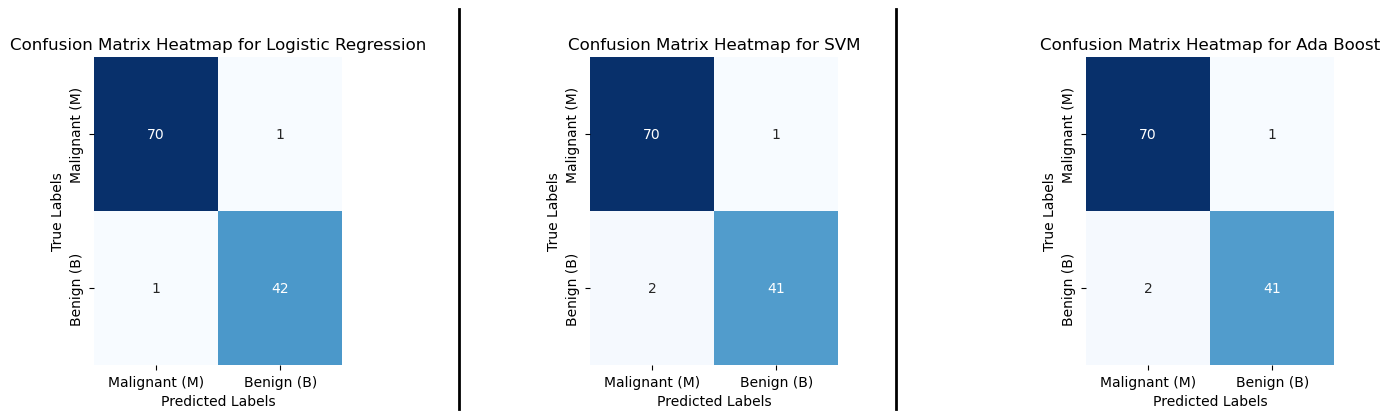

In [156]:
# Create a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# Iterate over the best models DataFrame
for index, (row, ax) in enumerate(zip(best_models.iterrows(), axes)):
    model_name = row[1]['Model']  # Get the model name
    best_params = row[1]['Best Params']  # Get the best parameters for the model

    model = models.get(model_name)  # Retrieve the model from the models dictionary
    model.fit(X_train, y_train)  # Fit the model on the training data

    # Predict using the current model
    y_pred_best = model.predict(X_test)
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    
    # Plot the heatmap for the confusion matrix on the appropriate subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant (M)', 'Benign (B)'], 
                yticklabels=['Malignant (M)', 'Benign (B)'], cbar=False, ax=ax)
        
    # Set the title and labels
    ax.set_title(f'Confusion Matrix Heatmap for {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

# Add a black vertical line between the subplots
# We are going to manually add vertical lines at the boundaries of the subplots
for i in range(1, len(axes)):
    # Get the x positions for the right edge of the previous subplot and the left edge of the current subplot
    x1 = axes[i-1].get_position().xmax  # Right side of the previous subplot
    x2 = axes[i].get_position().xmin    # Left side of the current subplot
    
    # Draw a vertical line at the boundary between subplots
    fig.add_artist(Line2D([x1, x1], [0, 1], color='black', linewidth=2, transform=fig.transFigure))

# Adjust layout for better spacing
plt.subplots_adjust(wspace=1)

plt.show()


# Summary

The result shows `Logistic Regression`, `Support Vector Machine (SVM)` and `Ada Boost` models all show great performance for this dataset. <br> 
They have the same mean accuracy score (`0.978`) across the folds of cross-validation for the best hyperparameters found by the grid search. <br>
The only difference is Logistic Regression model identified only 1 false negative cases which means the sample is actually Malignant but the model classified it as a Benign one.<br>
The SVM and Ada Boost models both have 2 false positive cases, even with same mean accuracy score as the Logistic Regression model.

So, for this reason, I'd chooose `Logistic Regression` model for this dataset, with the following parameters:

<div class="alert alert-block alert-success">
{C= 0.1, max_iter= 10000, penalty= 'l2', solver= 'liblinear'}
</div>


# Next Step

Apply the `Logistic Regerssion` model on a larger sacle dataset to evaluate its performance, and use Grid Search Cross Validation to see if current best parameters are still hold for more data. 